## Name: Adwaiy Singh
## Reg No.: 220968424
## Class: DSE-A
## Batch: A2

# Week 4

# EXERCISE 1: Data Analysis using CEREALS dataset

## Use the prepared or preprocessed data to answer the following:
#### 1. Cross tabulate the type of cereal (hot vs cold) against the manufacturer

In [2]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("Cereals.csv")
pd.crosstab(df['type'], df['mfr'])

mfr,A,G,K,N,P,Q,R
type,,,,,,,
C,0,22,23,4,9,7,8
H,1,0,0,1,0,1,0


#### 2. Which is the cereal with the best rating, worst rating?

In [3]:
print(df['name'][df['rating'].idxmax()])
print(df['name'][df['rating'].idxmin()])

All-BranwithExtraFiber
CapnCrunch


#### 3. Plot a side-by-side boxplot comparing the consumer rating of hot vs. cold cereals. 

<Axes: xlabel='type', ylabel='rating'>

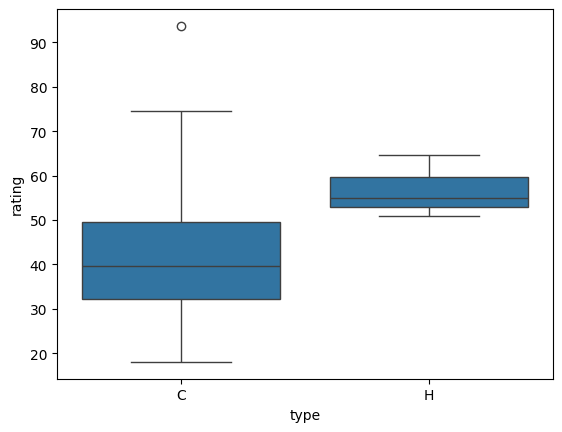

In [4]:
sns.boxplot(data=df, x='type', y='rating')

#### 4. Is there a relation between sugars, calories, carbs, and fat?

In [8]:
numeric_columns = ['sugars', 'calories', 'carbo', 'fat']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

print(df[numeric_columns].corr())

            sugars  calories     carbo       fat
sugars    1.000000  0.574758 -0.501086  0.302610
calories  0.574758  1.000000  0.207539  0.510630
carbo    -0.501086  0.207539  1.000000 -0.313635
fat       0.302610  0.510630 -0.313635  1.000000


#### 5. Which manufacturers produce cereal with highest calories?

In [6]:
df['mfr'][df['calories'].idxmax()]

'K'

#### 6. Use correlation tests and visualization to identify if the two variables calories and consumer rating associated?

-0.6743360496799723


<Axes: xlabel='calories', ylabel='rating'>

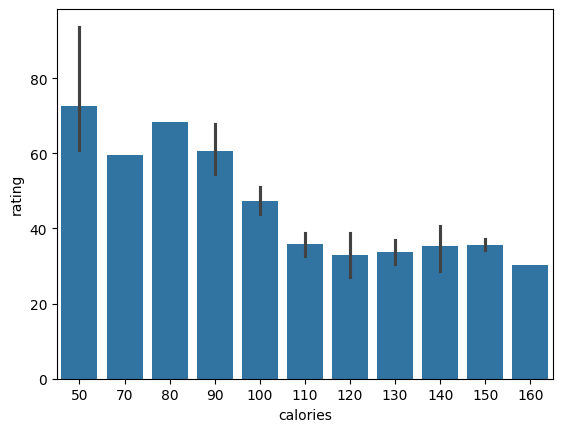

In [9]:
print(df['calories'].corr(df['rating']))
sns.barplot(data=df, x='calories', y='rating')

#### 7. Use correlation tests and visualization to identify if the two variables shelf and consumer rating associated? 

0.0019730207509652386


<Axes: xlabel='shelf', ylabel='rating'>

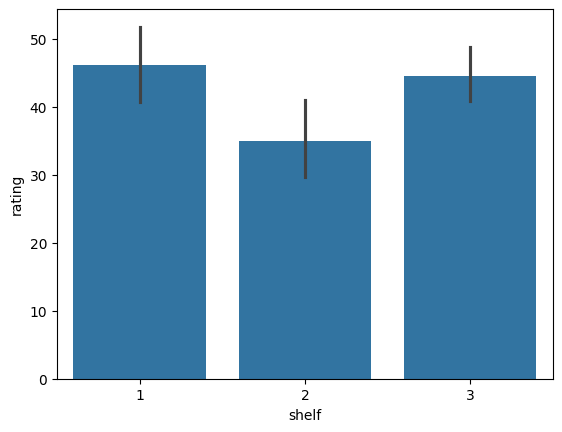

In [10]:
print(df['shelf'].corr(df['rating']))
sns.barplot(data=df, x='shelf', y='rating')

#### 8. Is there a relation between manufacturer and rating?

In [11]:
var = df['shelf'].corr(df['rating'])
if (var > -0.04 and var < 0.4):
    print("No or very little correlation")
else:
    print("Medium to high correlation")

No or very little correlation


#### 9. Which nutrients are essential for a good rating for a cereal?

In [13]:
numeric_columns = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'rating']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Calculate the correlation
corrList = df[numeric_columns].corr()
corrList = corrList['rating']

for nutrient, corr in corrList.items():
    print(f'Correlation between {nutrient} and rating: {corr}')

Correlation between calories and rating: -0.6743360496799723
Correlation between protein and rating: 0.45368316809056336
Correlation between fat and rating: -0.41843890124152616
Correlation between sodium and rating: -0.4020771797632025
Correlation between fiber and rating: 0.5572418136133619
Correlation between carbo and rating: 0.16135708070042998
Correlation between sugars and rating: -0.7761813737204284
Correlation between potass and rating: 0.3766601976154804
Correlation between vitamins and rating: -0.24251614776429334
Correlation between rating and rating: 1.0


#### 10. Design a Linear regression model to predict the rating of a cereal based on top 3 related nutrients. Tabulate the accuracy of the model using an 80, 20 split.

# EXERCISE 2 – Descriptive Analytics and Visualization using Matplotlib, Seaborn: 
### (Cross tabulation, distributions, Multi-variate analysis, Various Plots)
## Use the IPL datasets and answer the following:
#### 1) Count the total number of matches conducted in the year 2008

In [1]:
import pandas as pd
import seaborn as sns

df1 = pd.read_csv("deliveries.csv")
df2 = pd.read_csv("matches.csv")

df2[df2['season'] == 2008]['season'].value_counts()

2008    58
Name: season, dtype: int64

#### 2) Find the city name where maximum and minimum number of matches conducted.

In [2]:
print(df2['city'].value_counts().idxmax())
print(df2['city'].value_counts().idxmin())

Mumbai
Bloemfontein


#### 3) Find total count of matches city wise.

In [3]:
df2['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cuttack             7
Ranchi              7
Port Elizabeth      7
Cape Town           7
Abu Dhabi           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: city, dtype: int64

#### 4) Find the Team which is maximum and minimum toss winner.

In [4]:
print(df2['toss_winner'].value_counts().idxmax())
print(df2['toss_winner'].value_counts().idxmin())

Mumbai Indians
Rising Pune Supergiant



#### 5) Check the toss decision that the team has taken.

In [5]:
pd.crosstab(df2['toss_winner'], df2['toss_decision'])

toss_decision,bat,field
toss_winner,,
Chennai Super Kings,48,41
Deccan Chargers,24,19
Delhi Capitals,2,8
Delhi Daredevils,29,51
Gujarat Lions,1,14
Kings XI Punjab,26,55
Kochi Tuskers Kerala,3,5
Kolkata Knight Riders,30,62
Mumbai Indians,44,54



#### 6) Count the total number of normal and tie matches.

In [6]:
df2['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64


#### 7) Find the team names where the match result is tie.

In [7]:
df2[df2['result'] == 'tie'][['team1', 'team2']].value_counts().to_frame("No of ties")

,,No of ties
team1,team2,
Rajasthan Royals,Kolkata Knight Riders,2
Delhi Daredevils,Royal Challengers Bangalore,1
Gujarat Lions,Mumbai Indians,1
Kings XI Punjab,Chennai Super Kings,1
Kolkata Knight Riders,Delhi Capitals,1
Mumbai Indians,Sunrisers Hyderabad,1
Rajasthan Royals,Kings XI Punjab,1
Royal Challengers Bangalore,Sunrisers Hyderabad,1



#### 8) Find the team name who won the match by highest runs.

In [8]:
df2['winner'][df2['win_by_runs'].idxmax()]

'Mumbai Indians'


#### 9) Find the team name who won the match by lowest runs.

In [9]:
df2['winner'][df2['win_by_runs'].idxmin()]

'Rising Pune Supergiant'


#### 10) Find the players who was awarded “Player of the match” more than 3 times.

In [10]:
df3 = df2.groupby('player_of_match').count()
df3 = df3[df3['id']>3]
df3['id']

player_of_match
A Mishra          11
A Nehra            6
AB de Villiers    20
AC Gilchrist       7
AD Russell        11
                  ..
UT Yadav           8
V Kohli           12
V Sehwag          11
YK Pathan         16
Yuvraj Singh       5
Name: id, Length: 65, dtype: int64


#### 11) Find the player who was awarded as player of the match maximum times.

In [11]:
df2['player_of_match'].value_counts().idxmax()

'CH Gayle'


#### 12) Find the Venue where the team won the match by highest runs.

In [17]:
print(df2['venue'][df2['win_by_runs'].nlargest(1)])

146    SuperSport Park
Name: venue, dtype: object



#### 13) Find the Venue where the team won the match by lowest runs.

In [22]:
df2.nsmallest(1, ['win_by_runs'])

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN



#### 14) Find the Umpires who did umpiring maximum times.

In [23]:
print(df2['umpire1'].value_counts().idxmax())
print(df2['umpire2'].value_counts().idxmax())
print(df2['umpire3'].value_counts().idxmax())

HDPK Dharmasena
C Shamshuddin
Nitin Menon



#### 15) Find the Total matches played in each season

In [24]:
df2['season'].value_counts()

2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2018    60
2019    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64


#### 16) Find the Total runs in each season

In [25]:
match_detail = df2[['id', 'season']].merge(df1, left_on='id', right_on='match_id', how='left')
match_detail.groupby(['season'])['total_runs'].sum().reset_index()

,season,total_runs
0,2008,17937
1,2009,16353
2,2010,18883
3,2011,21154
4,2012,22453
5,2013,22602
6,2014,18931
7,2015,18353
8,2016,18862
9,2017,18786



#### 17) No. of tosses won by each team

In [26]:
df2['toss_winner'].value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64


#### 18) Visualize the Toss decision across seasons

In [27]:
pd.crosstab(df2['toss_decision'],df2['season'])

season,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
toss_decision,,,,,,,,,,,,
bat,26,35,39,25,37,45,19,25,11,11,10,10
field,32,22,21,48,37,31,41,34,49,48,50,50



#### 19) Find the Dismissal Kind and Visualize using best fit graph

<Axes: xlabel='season', ylabel='count'>

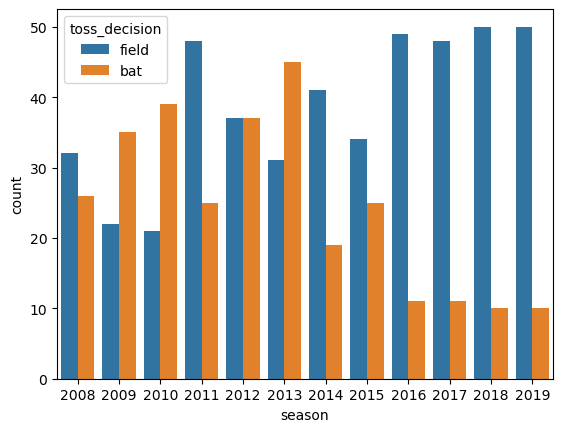

In [28]:
sns.countplot(data = df2, x = 'season' , hue = 'toss_decision')


#### 20) Find the Top 10 run scorers in IPL and Visualize using best fit graph

<Axes: xlabel='count', ylabel='dismissal_kind'>

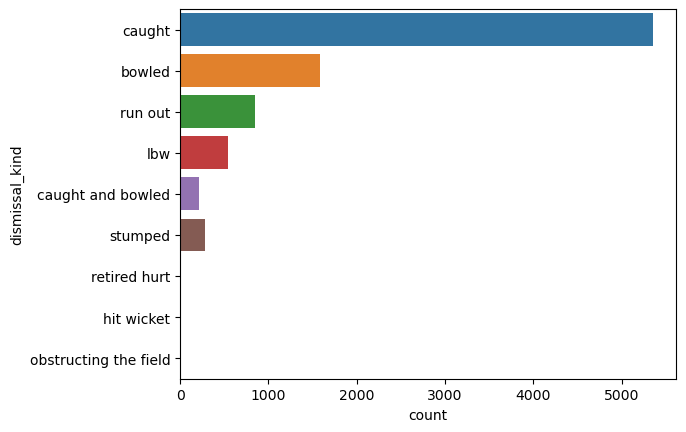

In [29]:
sns.countplot(data = df1, y = 'dismissal_kind')


#### 21) Visualize the Highest MOM award winners

<Axes: xlabel='batsman_runs', ylabel='batsman'>

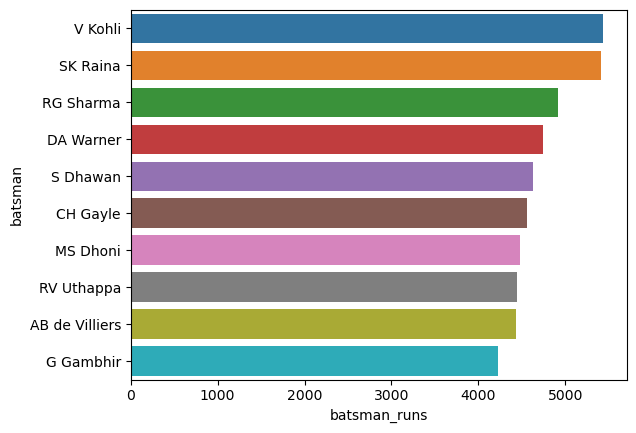

In [30]:
total_runs = df1.groupby('batsman')['batsman_runs'].sum().reset_index()

top_10_players = total_runs.nlargest(10, 'batsman_runs')

sns.barplot(data=top_10_players, x='batsman_runs', y='batsman')


#### 22) Find Total Number of Played Matches by each team

In [31]:
df2['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64


#### 23)Compare Total Played Matches vs Winning Matches vs Win Rate

In [42]:
sns.barplot(data=df2, x='matches_won_dist', y='matches_won_dist')

ValueError: Could not interpret input 'matches_won_dist'


#### 24) Find the Distribution of Won the Matches

In [36]:
toss_decision_counts = df2.groupby(['toss_winner', 'toss_decision']).size().reset_index(name='Count')
toss_decision_pivot = toss_decision_counts.pivot(index='toss_winner', columns='toss_decision', values='Count')
toss_decision_pivot

toss_decision,bat,field
toss_winner,,
Chennai Super Kings,48.0,41.0
Deccan Chargers,24.0,19.0
Delhi Capitals,2.0,8.0
Delhi Daredevils,29.0,51.0
Gujarat Lions,1.0,14.0
Kings XI Punjab,26.0,55.0
Kochi Tuskers Kerala,3.0,5.0
Kolkata Knight Riders,30.0,62.0
Mumbai Indians,44.0,54.0



#### 25)Ratio between Total Matches and Win Matches

<Axes: xlabel='bat', ylabel='toss_winner'>

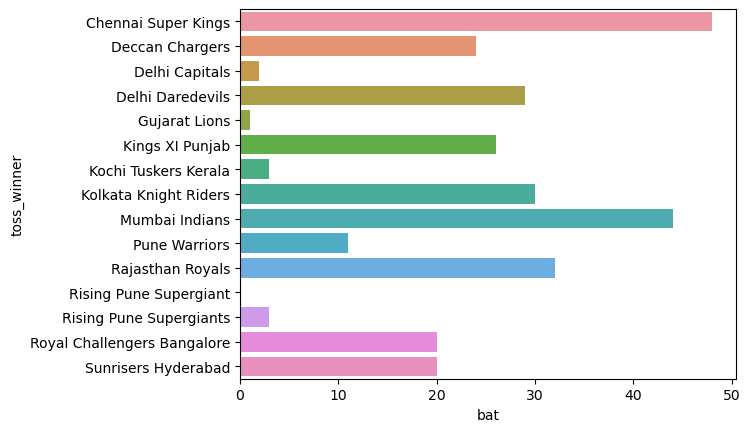

In [37]:
sns.barplot(data=toss_decision_pivot, x='bat', y=toss_decision_pivot.index, label='Bat')


#### 26) What is the choice of each team after winning the toss

<Axes: xlabel='field', ylabel='toss_winner'>

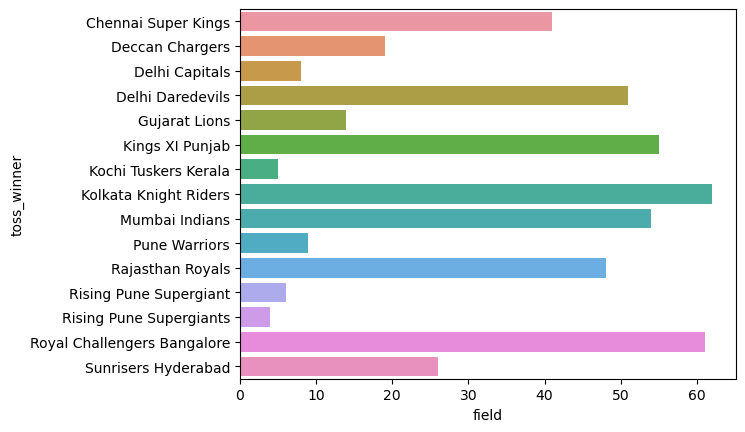

In [38]:
sns.barplot(data=toss_decision_pivot, x='field', y=toss_decision_pivot.index, label='Field')